In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time
from IPython import display
from scipy import stats
from scipy import interpolate
from sklearn.neighbors import KernelDensity
from modules.training import MFOC
from modules.analysis import plot_loss_fct
from modules.analysis import loss_comparison_Lambda, loss_comparison_dt

dt is 0.1, hence the networks has 10 layers
(200, 2)
(4, 10, 200)
 --> ITERATION 1
Moving the particles forward...


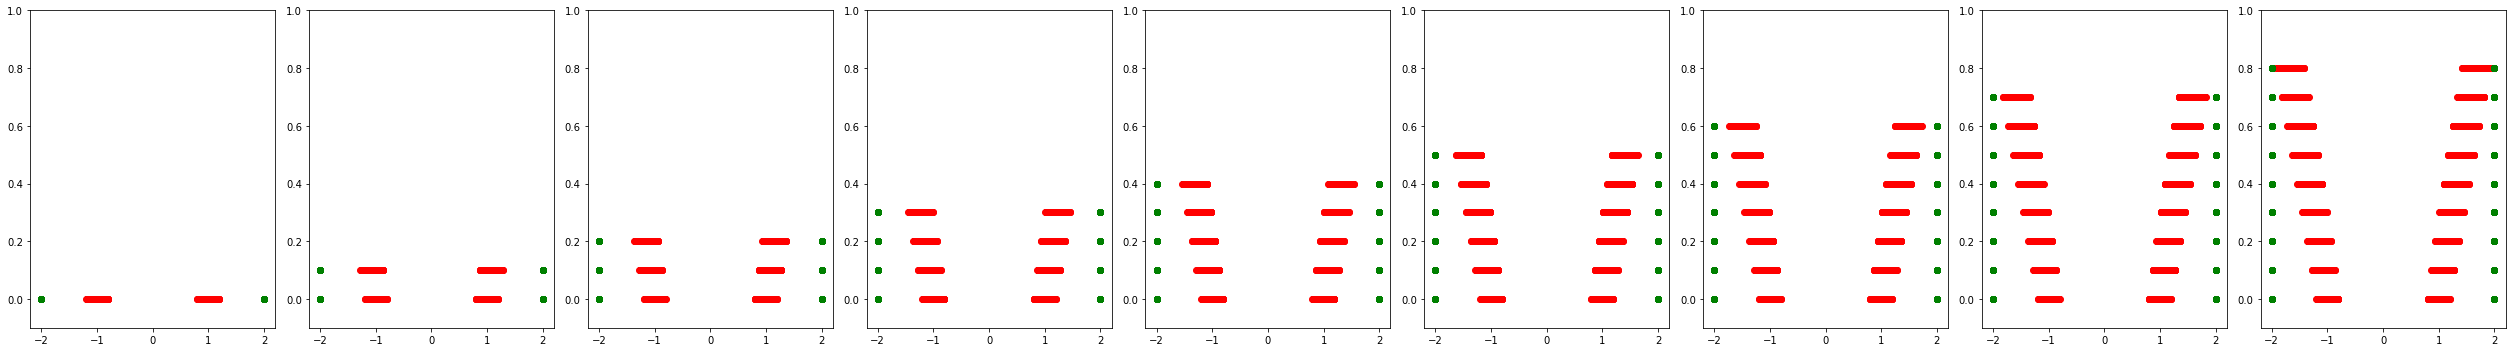

Solving the backward equation...


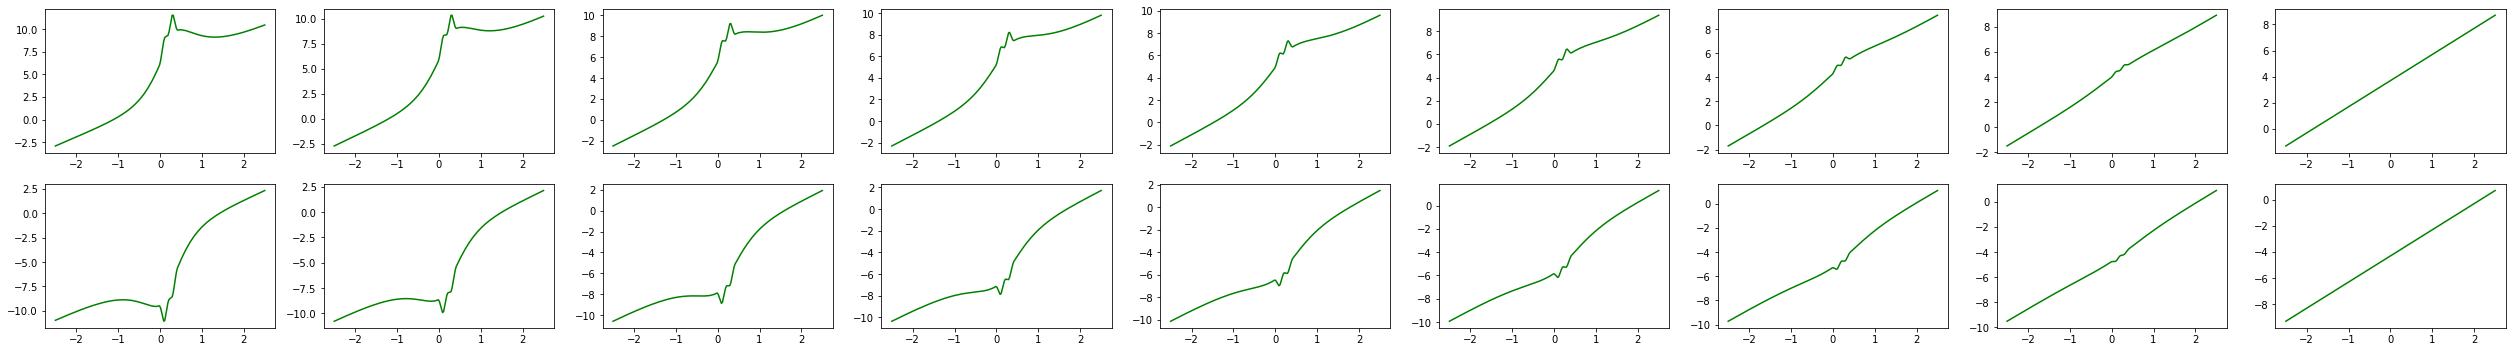

Updating the parameter...
With a mean accuracy of -0.2026381232551223, for each time step, theta has values:
[1.185]  [1.131]  [1.084]  [1.04]  [1.001]  [0.966]  [0.933]  [0.903]  [0.875]


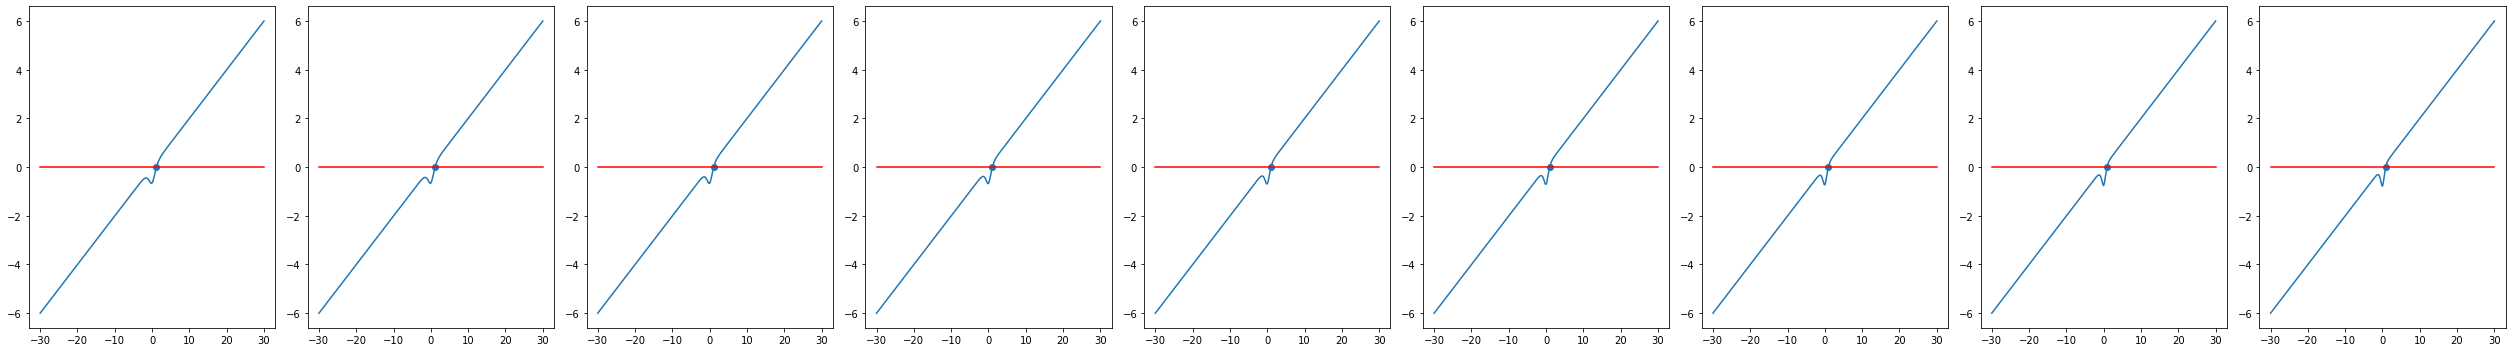

While the total number of times in which there was a switch sign is 0
 --> ITERATION 2
Moving the particles forward...


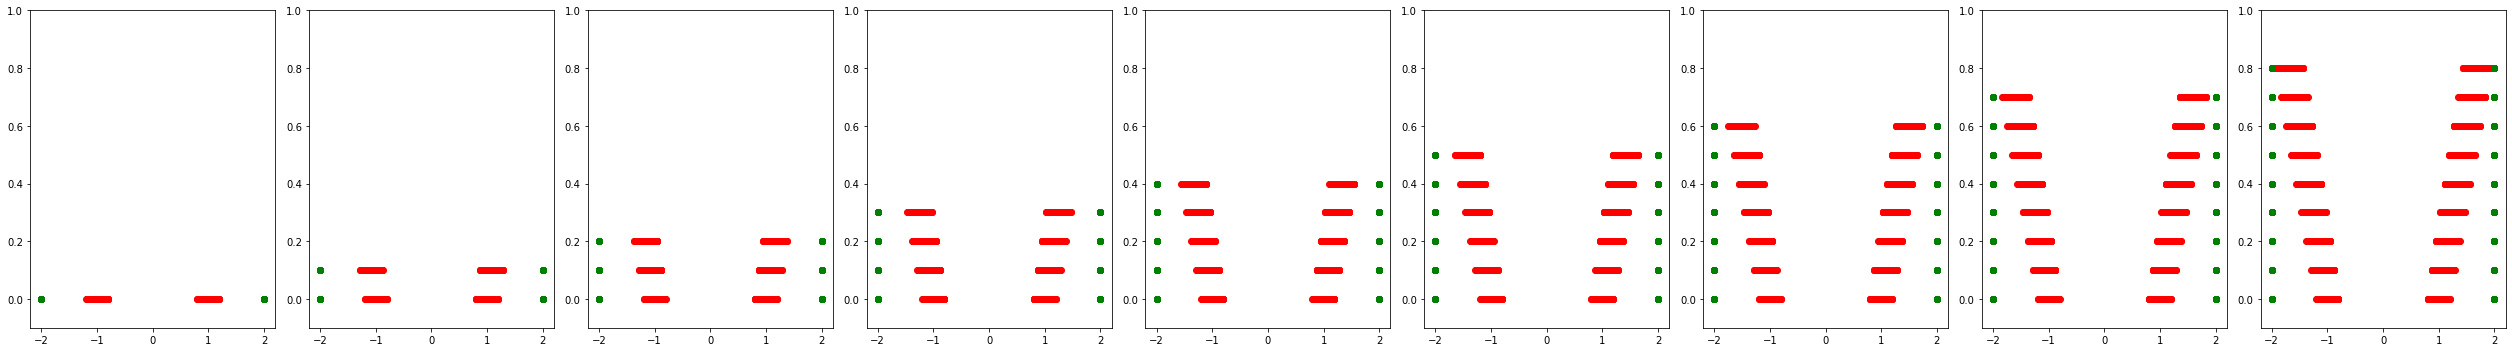

Solving the backward equation...


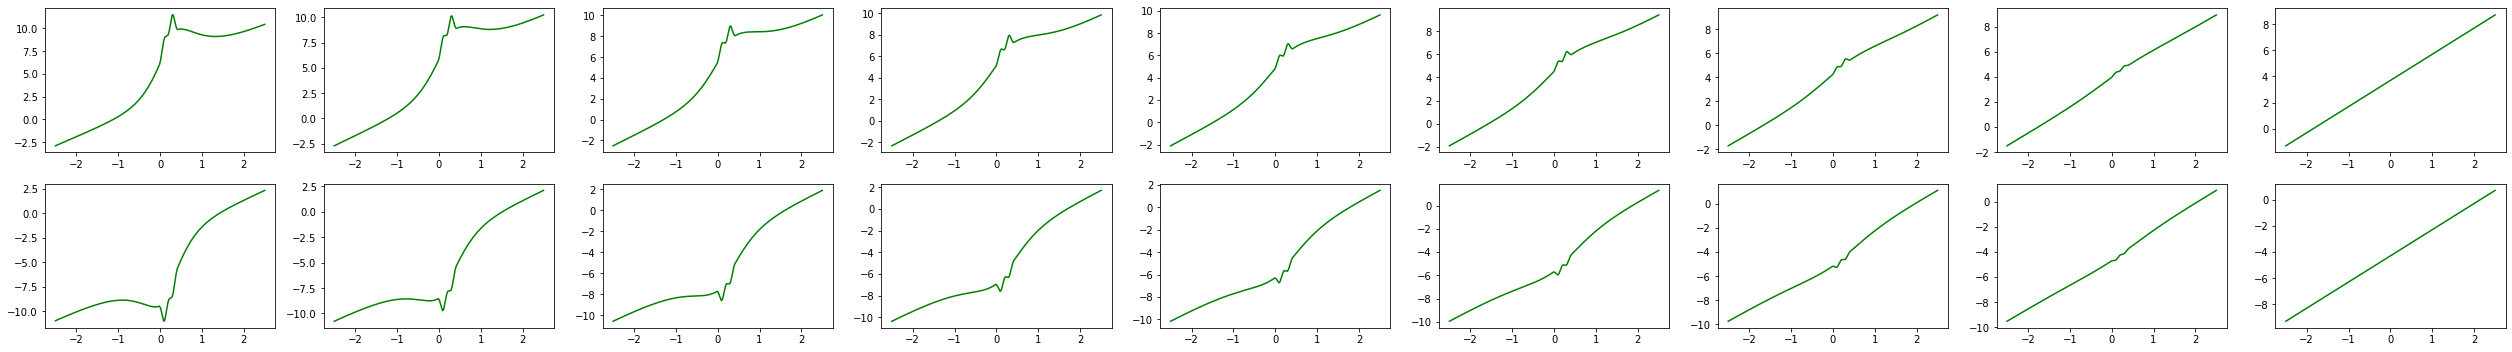

Updating the parameter...
With a mean accuracy of -0.1997954821544403, for each time step, theta has values:
[1.17]  [1.115]  [1.067]  [1.025]  [0.986]  [0.952]  [0.92]  [0.891]  [0.864]


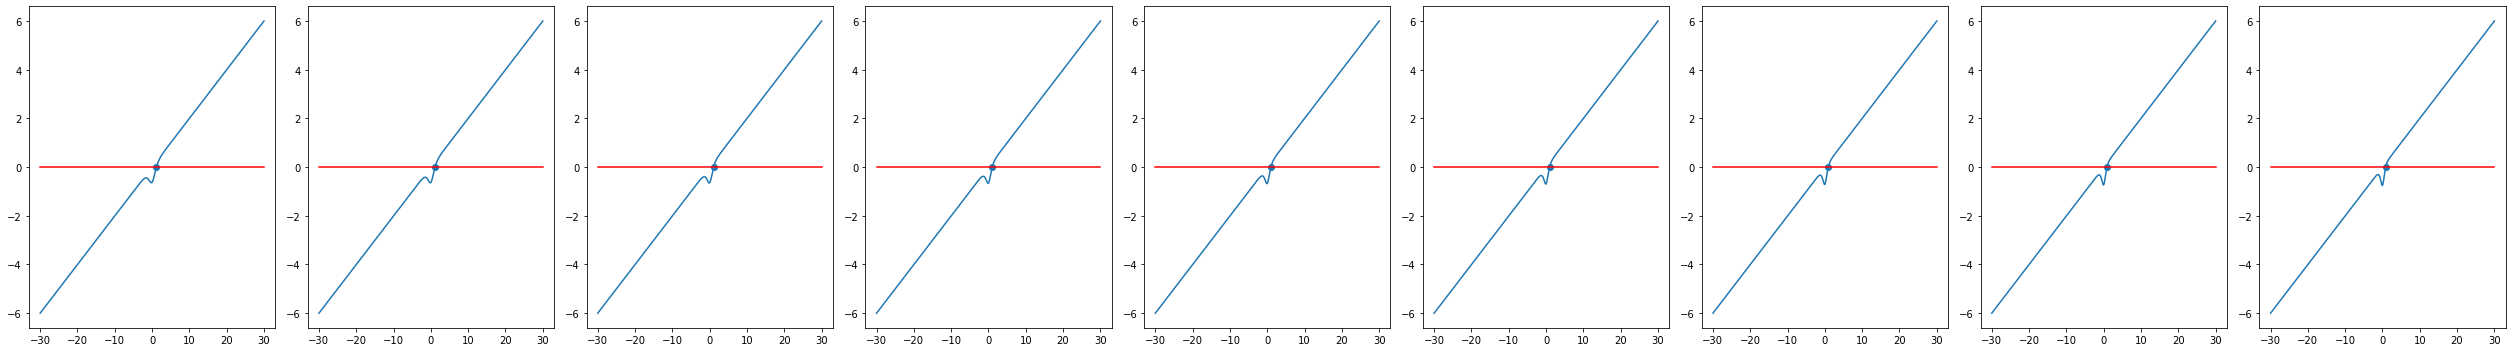

While the total number of times in which there was a switch sign is 0
 --> ITERATION 3
Moving the particles forward...


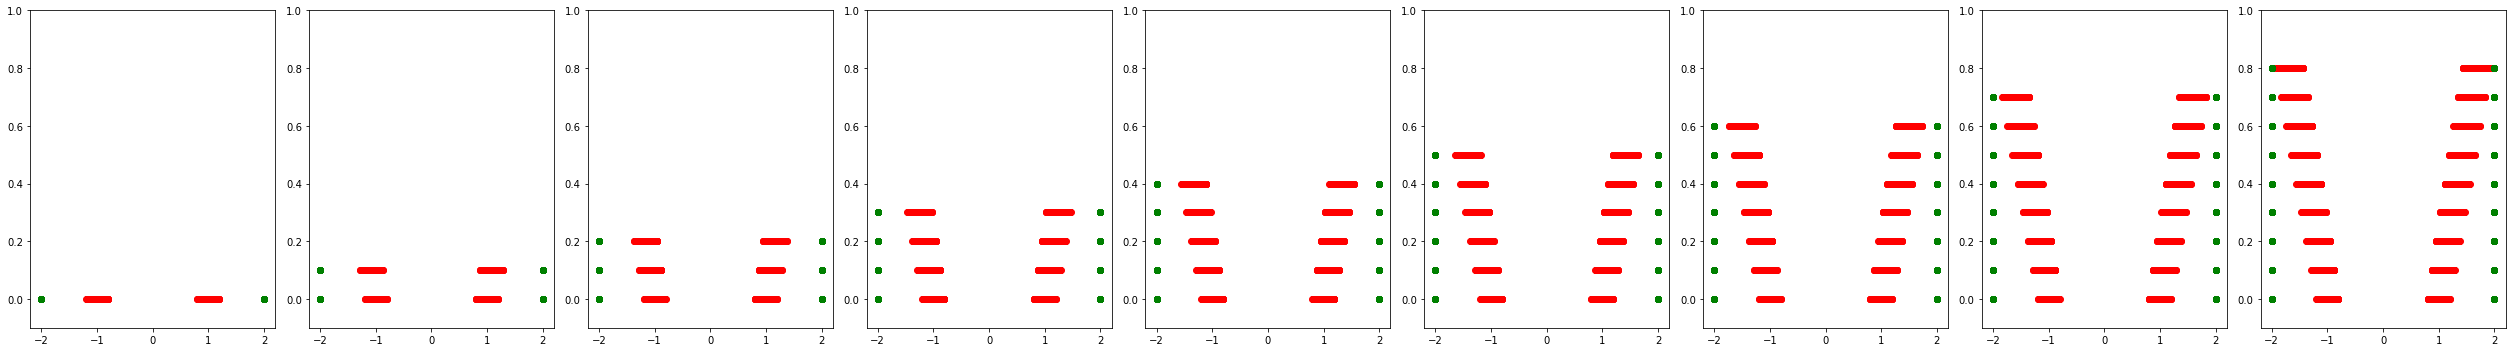

Solving the backward equation...


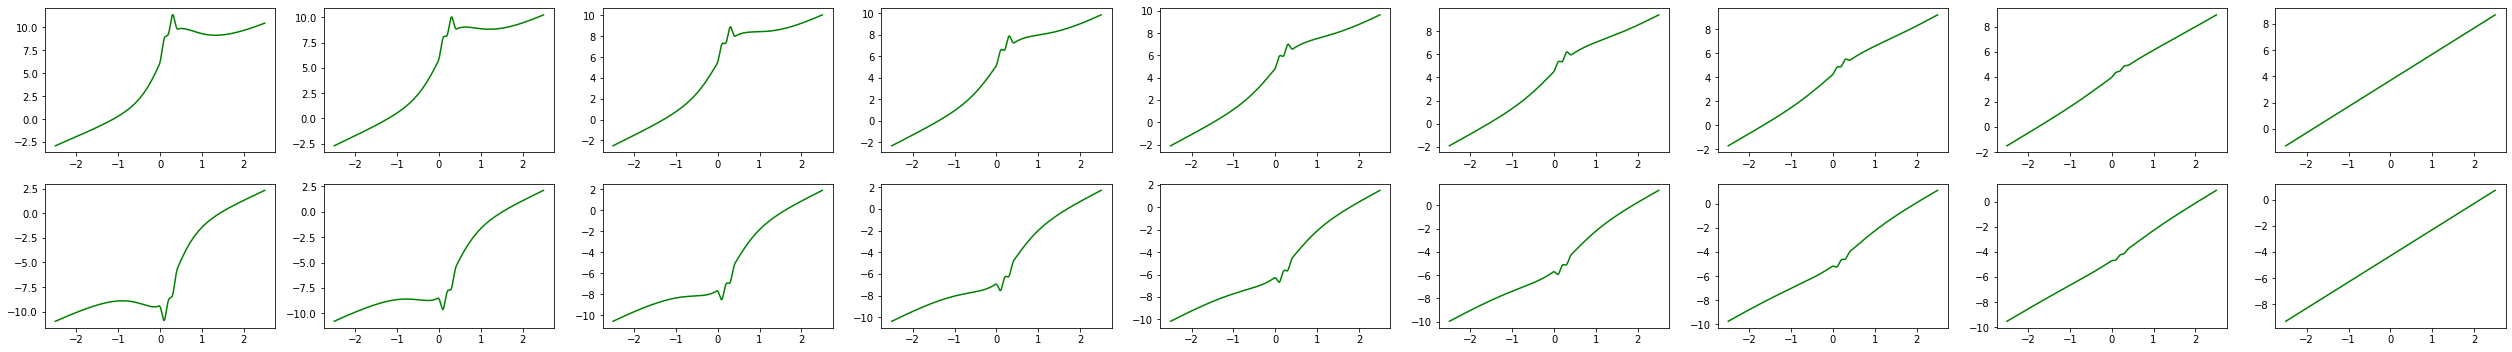

Updating the parameter...
With a mean accuracy of -0.20123923920150633, for each time step, theta has values:
[1.179]  [1.124]  [1.075]  [1.032]  [0.994]  [0.959]  [0.927]  [0.897]  [0.87]


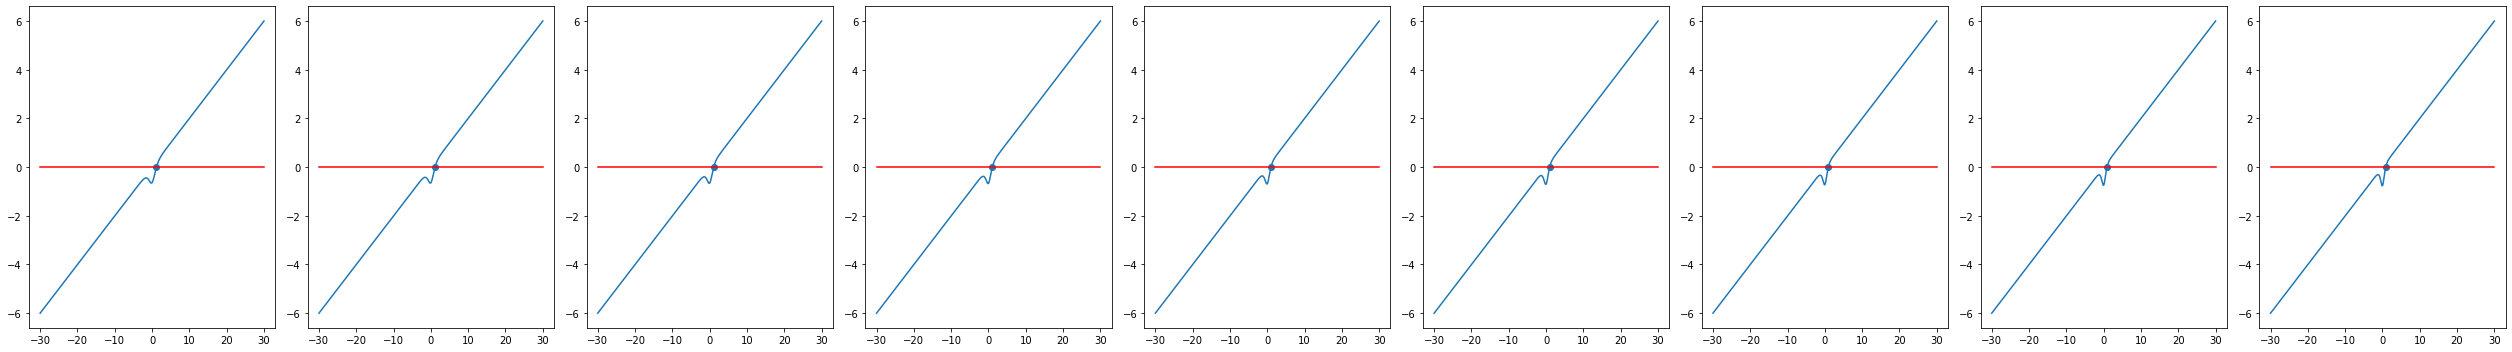

While the total number of times in which there was a switch sign is 0
 --> ITERATION 4
Moving the particles forward...


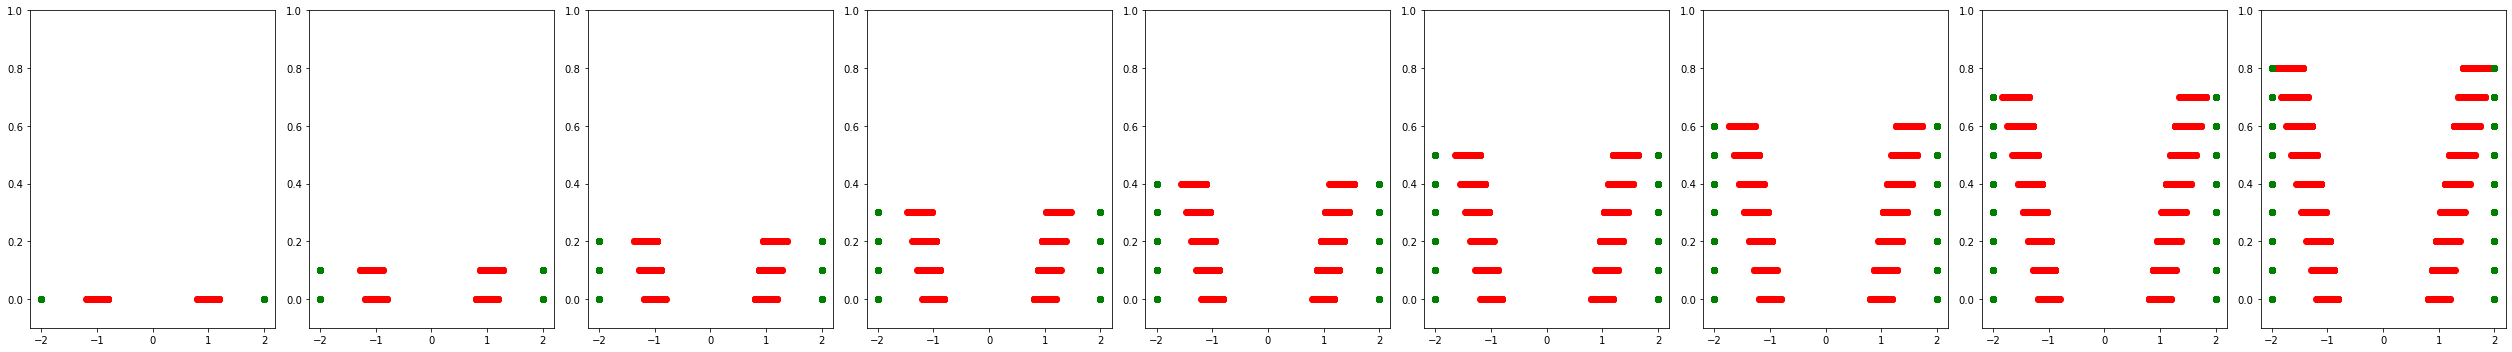

Solving the backward equation...


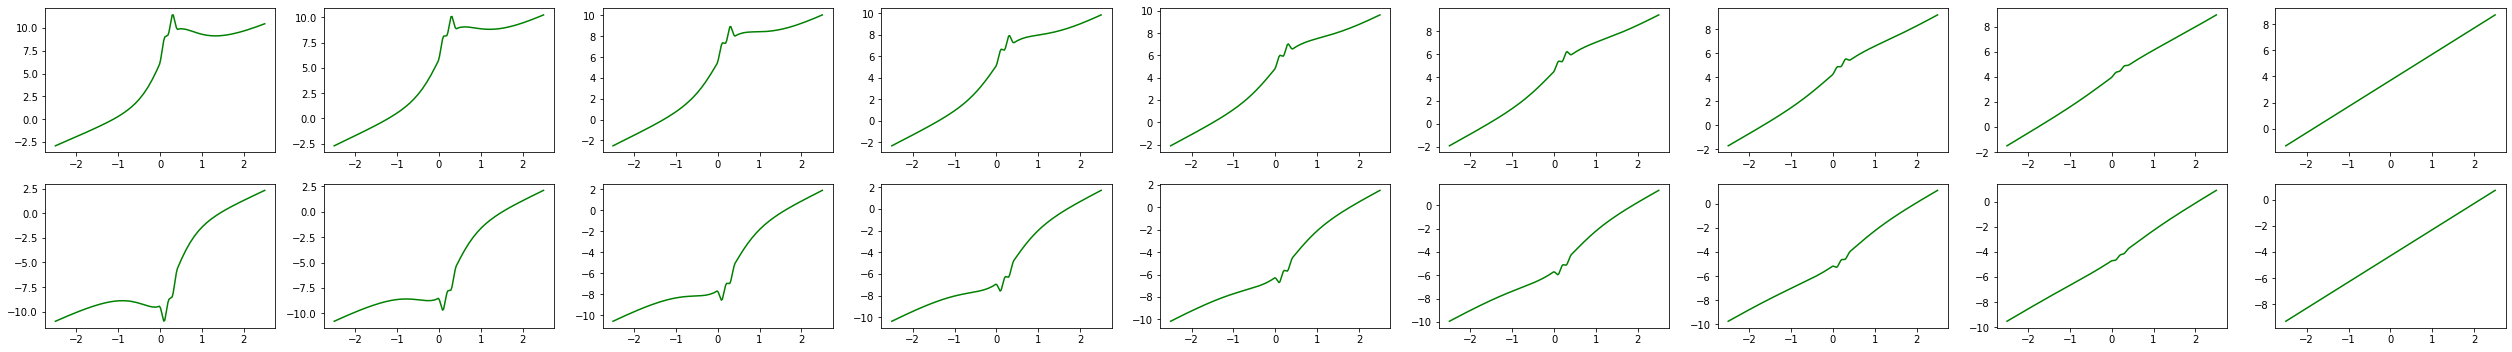

Updating the parameter...
With a mean accuracy of -0.20050183106851246, for each time step, theta has values:
[1.175]  [1.119]  [1.071]  [1.028]  [0.99]  [0.955]  [0.923]  [0.894]  [0.867]


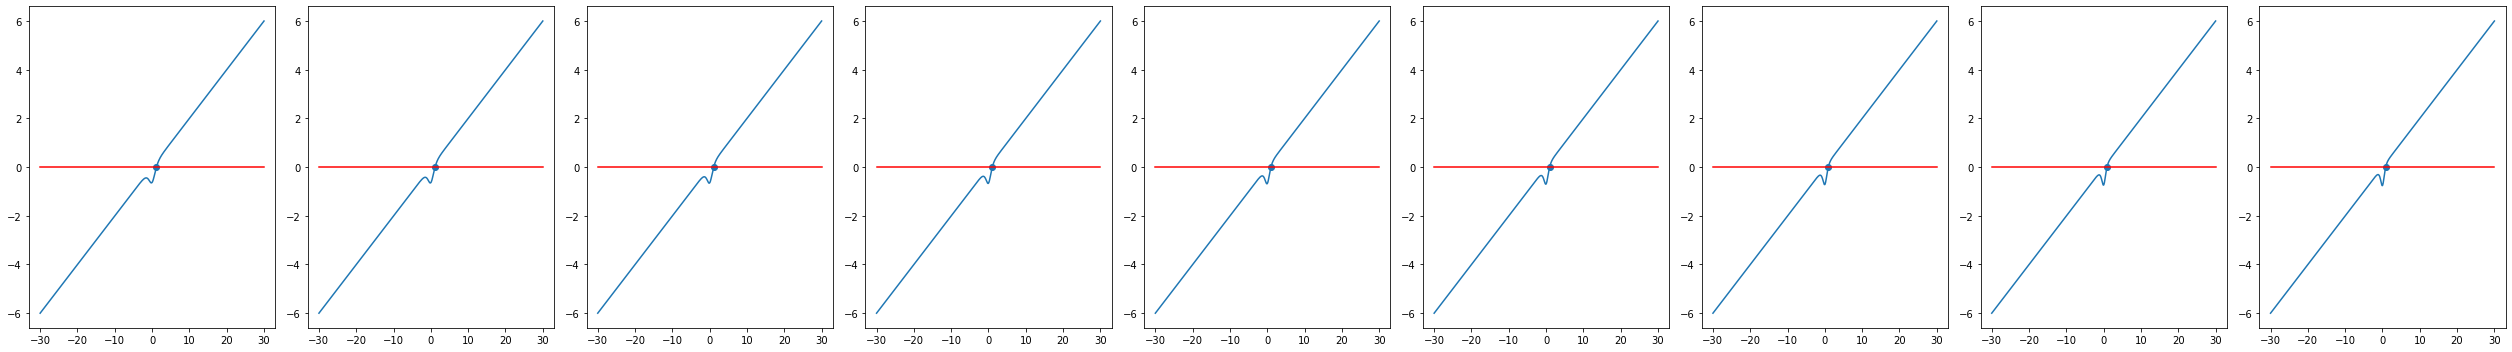

While the total number of times in which there was a switch sign is 0


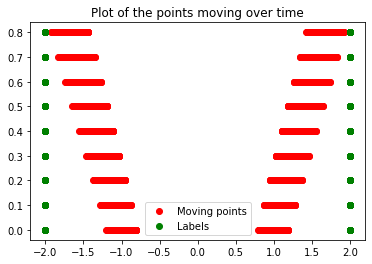

The loss fuction has value:
0.21932490670617483
The number of sign switches for each iteration is: 
[0. 0. 0. 0.]


In [2]:
N_points = 100
d = 1
T = 1
dt = 0.1 #0.1 #0.05
Nt = int(round(T/float(dt)))
print("dt is %s, hence the networks has %s layers" %(dt, Nt))

# Initial distribution
R = 0.2
mu_0 = "bigaussian"
center_left = -1
center_right = 1
mid_point = 0
y_left = -2
y_right = 2

# Mesh
xmin = -7
xmax = 7
grid_points = 141 #71 #141

#Initial guess of theta
theta = 1*np.ones((Nt-1,d)) 
#theta = np.random.rand(Nt-1,d)

#Activation function
def F(x, theta):
    return np.tanh(theta*x)

#Regularization parameter
Lambda = 0.1                #non ho visto il risultato di Lambda = 0.001 ma sembrava avere lo stesso behavior quindi ho diminuito Lambda ma nel caso riprova

#Number of iterations
num_iterations = 4 #31

np.random.seed(6)
theta, theta_trace, mu = MFOC(N_points, d, T, dt, R, mu_0, center_left, center_right, y_left, y_right, xmin, xmax, grid_points, theta, F, mid_point, Lambda, num_iterations) 

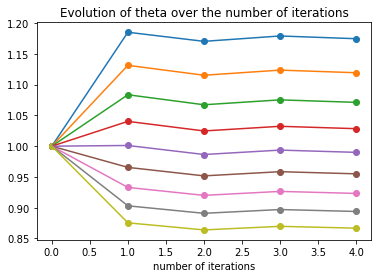

In [3]:
for k in range(theta_trace.shape[1]):
    plt.scatter(range(num_iterations+1),  theta_trace[:,k])
    plt.plot(range(num_iterations+1), theta_trace[:,k])
plt.title("Evolution of theta over the number of iterations")
plt.xlabel("number of iterations")
plt.savefig("theta_evolution_#iter_initial_guess_neg-ones.png")
plt.show()

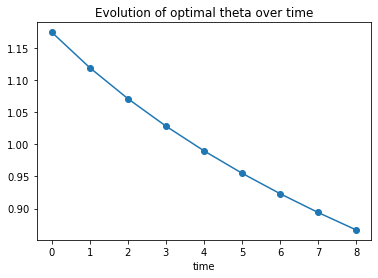

In [4]:
plt.scatter(range(Nt-1), theta_trace[-1,:])
plt.plot(range(Nt-1), theta_trace[-1,:])
plt.title("Evolution of optimal theta over time")
plt.xlabel("time")
plt.savefig("theta_evolution_time_initial_guess_neg-ones.png")
plt.show()

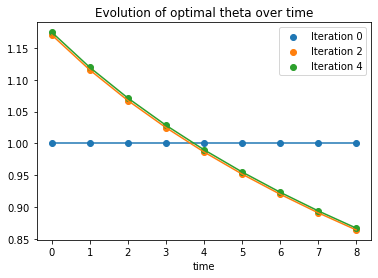

In [5]:
for k in range(0,theta_trace.shape[0]):
    if k%1 == 0:
        plt.scatter(range(Nt-1), theta_trace[k,:], label="Iteration %s" %k)
        plt.plot(range(Nt-1), theta_trace[k,:])
plt.legend()
plt.title("Evolution of optimal theta over time")
plt.xlabel("time")
plt.savefig("many_theta_evolution_time_random_initial_guess_neg-ones.png")
plt.show()

Creation of the videos:

In [ ]:
from modules.training import initial_distribution, move_forward

Z = initial_distribution(y_left, y_right, N_points, mu_0, d, R, mid_point, center_left, center_right)
Z_trace, _, _ = move_forward(dt, Nt, N_points, Z, F, theta, mid_point, y_left, y_right, xmin, xmax)

In [ ]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-0.1, 1.2))
ax.set_yticks([])
X = Z_all[:,0][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
log_dens = kde.score_samples(x_new[:, np.newaxis])                          
dist = np.exp(log_dens)
x = np.linspace(-3,3,200)
y = dist
ax.plot(x,y,'r', label="Initial distribution")
ax.scatter([-2,2],np.zeros(2),c='green', label='Labels')
line, = ax.plot([], [], label="Moving distribution")
plt.legend()

# initialization function: plot the background of each frame
def init():
    X = Z_all[:,0][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
    log_dens = kde.score_samples(x_new[:, np.newaxis])                          
    dist = np.exp(log_dens)
    x = np.linspace(-3,3,200)
    y = dist
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    X = Z_trace[i,:,0][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
    log_dens = kde.score_samples(x_new[:, np.newaxis])                          
    dist = np.exp(log_dens)
    x = np.linspace(-3,3,200)
    y = dist
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt-1, interval=Nt-1, blit=True)

writergif = animation.PillowWriter(fps=1)
anim.save('bigaussian1D.gif',writer=writergif)